In [64]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [65]:
# Задаем seed для повторяемости результатов
numpy.random.seed(42)

In [66]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [67]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3

In [68]:
# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [70]:
NON_X_train = X_train.copy()
NON_X_test = X_test.copy()

In [92]:
NON_X_train[10]

array([[[53., 65., 53.],
        [54., 63., 52.],
        [56., 60., 50.],
        ...,
        [47., 51., 50.],
        [41., 45., 44.],
        [24., 28., 27.]],

       [[46., 59., 41.],
        [53., 62., 45.],
        [54., 59., 44.],
        ...,
        [42., 46., 45.],
        [39., 43., 42.],
        [28., 32., 31.]],

       [[45., 59., 38.],
        [50., 60., 41.],
        [46., 52., 34.],
        ...,
        [38., 42., 41.],
        [36., 40., 39.],
        [29., 33., 32.]],

       ...,

       [[71., 83., 66.],
        [74., 83., 66.],
        [80., 85., 67.],
        ...,
        [51., 54., 33.],
        [46., 49., 34.],
        [49., 50., 41.]],

       [[75., 82., 67.],
        [79., 85., 69.],
        [81., 85., 67.],
        ...,
        [61., 65., 41.],
        [64., 67., 48.],
        [48., 50., 41.]],

       [[85., 83., 71.],
        [85., 84., 71.],
        [86., 86., 70.],
        ...,
        [61., 65., 39.],
        [64., 67., 46.],
        [49., 50., 41.]]

In [72]:
X_train /= 255
X_test /= 255

In [93]:
X_train[10]

array([[[0.20784314, 0.25490198, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078432, 0.1764706 , 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078432],
        [0.20784314, 0.24313726, 0.1764706 ],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470589, 0.18039216, 0.1764706 ],
        [0.15294118, 0.16862746, 0.16470589],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.1764706 , 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078432],
        [0.18039216, 0.20392157, 0.13333334],
        ...,
        [0.14901961, 0.16470589, 0.16078432],
        [0.14117648, 0.15686275, 0.15294118],
        [0.11372549, 0.12941177, 0.1254902 ]],

       ...,

       [[0.2784314 , 0.3254902 , 0.25882354],
        [0.2901961 , 0.3254902 , 0.25882354],
        [0.3137255 , 0

In [74]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [75]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Convolution2D(32, (3, 3), activation='relu'))
# Первый слой подвыборки
model.add(MaxPooling2D((2, 2), padding='same'))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

In [76]:
# Третий сверточный слой
model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
# Второй слой подвыборки
model.add(MaxPooling2D((2, 2), padding='same'))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

In [77]:
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 15, 15, 64)        36928     
                                                      

In [78]:
from keras.models import clone_model
model_copy= clone_model(model)

In [79]:
model_copy.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 15, 15, 64)        36928     
                                                      

In [80]:
# Задаем параметры оптимизации
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [81]:
# Задаем параметры оптимизации
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_copy.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [87]:
# Обучаем модель без нормализации
NON_history = model_copy.fit(NON_X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True)

# Оцениваем качество обучения модели на тестовых данных
NON_scores = model_copy.evaluate(NON_X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (NON_scores[1]*100))

Точность работы на тестовых данных: 10.00%


In [83]:
# Обучаем модель c нормализацией
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True)

# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0968 - accuracy: 0.2204 - val_loss: 2.1342 - val_accuracy: 0.2452
Epoch 2/25
1407/1407 [==============================] - 6s 5ms/step - loss: 1.8152 - accuracy: 0.3450 - val_loss: 1.7279 - val_accuracy: 0.3830
Epoch 3/25
1407/1407 [==============================] - 6s 5ms/step - loss: 1.6129 - accuracy: 0.4170 - val_loss: 1.7143 - val_accuracy: 0.3842
Epoch 4/25
1407/1407 [==============================] - 6s 5ms/step - loss: 1.4614 - accuracy: 0.4707 - val_loss: 1.4092 - val_accuracy: 0.5078
Epoch 5/25
1407/1407 [==============================] - 6s 5ms/step - loss: 1.3560 - accuracy: 0.5118 - val_loss: 1.2429 - val_accuracy: 0.5570
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2728 - accuracy: 0.5413 - val_loss: 1.3572 - val_accuracy: 0.5208
Epoch 7/25
1407/1407 [==============================] - 6s 5ms/step - loss: 1.2031 - accuracy: 0.5697 - val_loss: 1.1020 - val_accuracy:

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

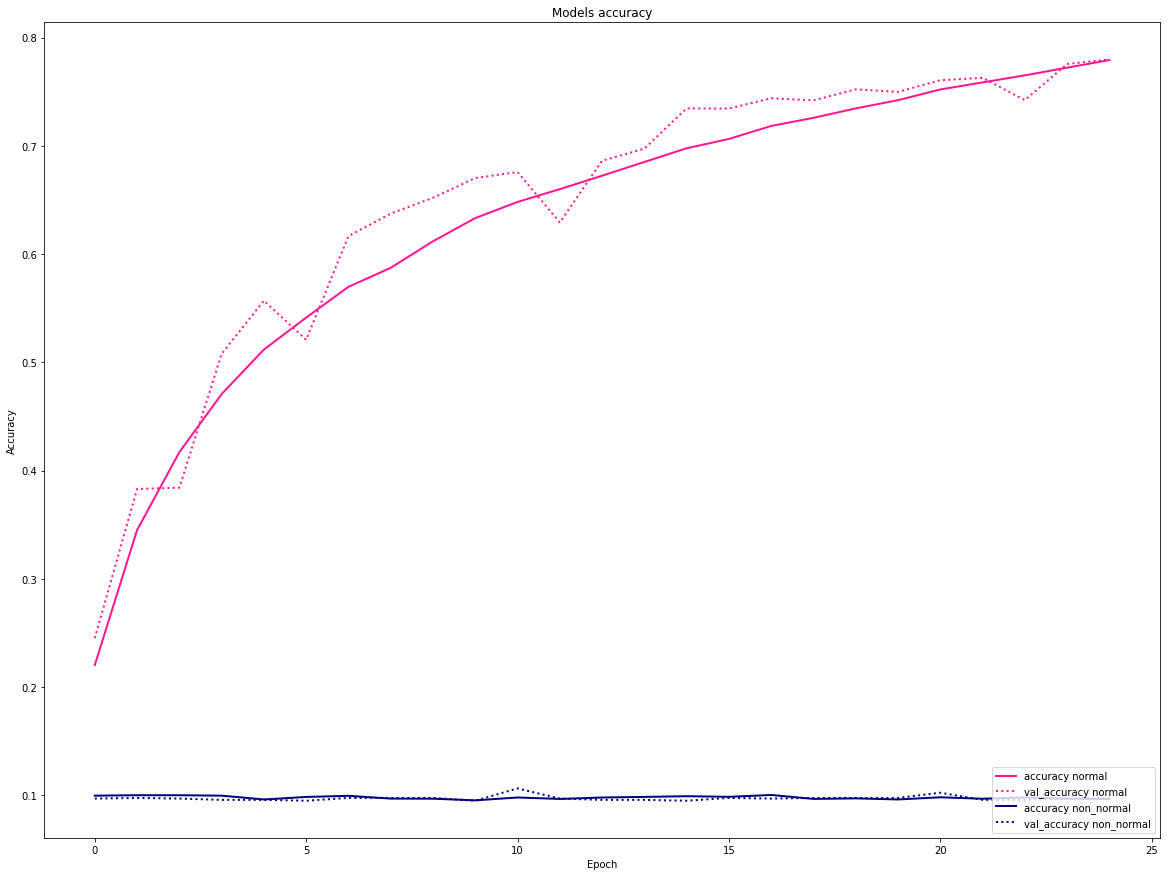

In [85]:
# Обучение и проверка точности значений
plt.figure(figsize=(20, 15))
plt.plot(
    history.history['accuracy'],
    color="deeppink",
    label="accuracy normal",
    linewidth=2,
)

plt.plot(
    history.history['val_accuracy'],
    color="deeppink",
    linestyle=":",
    label='val_accuracy normal',
    linewidth=2,
)

plt.plot(
    NON_history.history['accuracy'],
    color="navy",
    label='accuracy non_normal',
    linewidth=2,
)

plt.plot(
    NON_history.history['val_accuracy'],
    color="navy",
    linestyle=":",
    label='val_accuracy non_normal',
    linewidth=2,
)

plt.title('Models accuracy')

plt.ylabel('Accuracy')

plt.legend(loc="lower right")
plt.xlabel('Epoch')

plt.show()


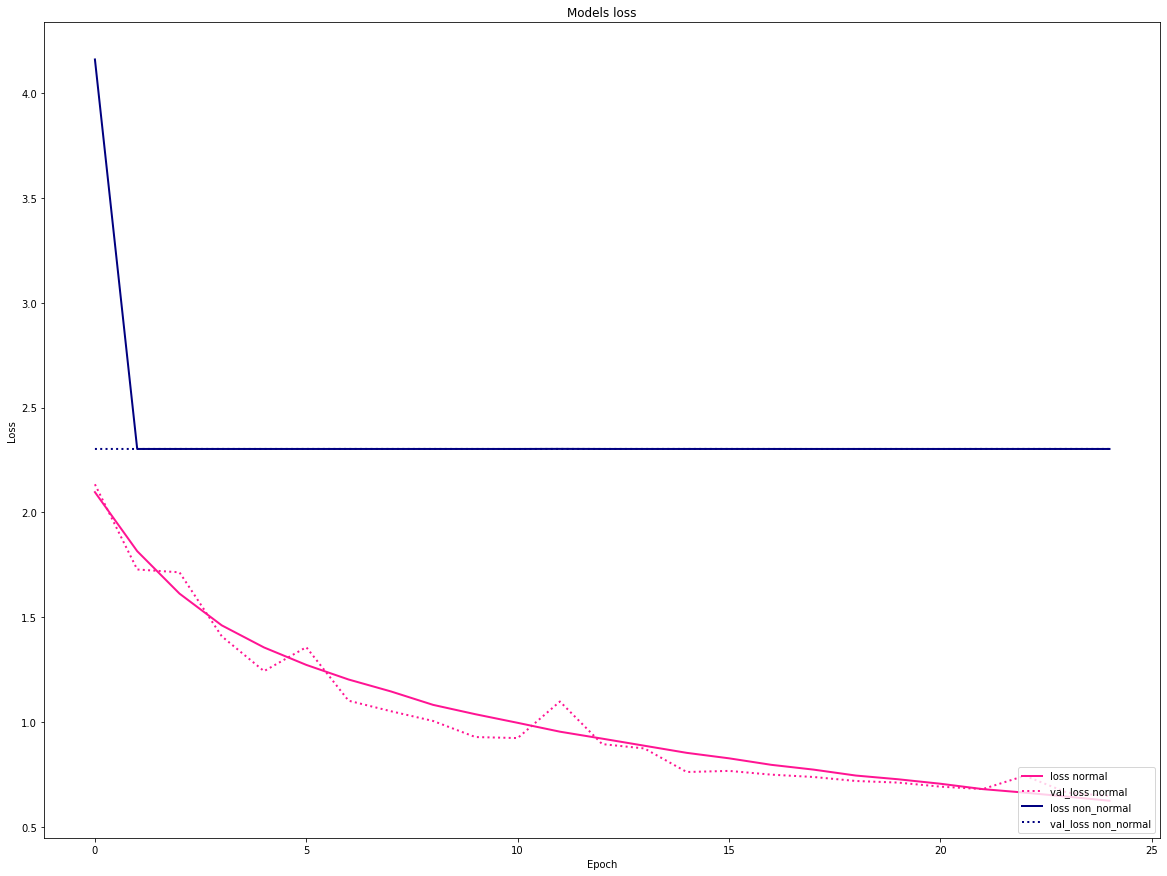

In [88]:
# Обучение и проверка величины потерь
plt.figure(figsize=(20, 15))

plt.plot(
    history.history['loss'],
    color="deeppink",
    label="loss normal",
    linewidth=2,
)

plt.plot(
    history.history['val_loss'],
    color="deeppink",
    linestyle=":",
    label='val_loss normal',
    linewidth=2,
)

plt.plot(
    NON_history.history['loss'],
    color="navy",
    label='loss non_normal',
    linewidth=2,
)

plt.plot(
    NON_history.history['val_loss'],
    color="navy",
    linestyle=":",
    label='val_loss non_normal',
    linewidth=2,
)

plt.title('Models loss')

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(loc="lower right")

plt.show()